In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files_outpatient = {
    "2018": "Op_WL 2018.csv",
    "2019": "Op_WL 2019.csv",
    "2020": "Op_WL 2020.csv",
    "2021": "Op_WL 2021.csv"
}

files_inpatient = {
    "2018": "IN_WL 2018.csv",
    "2019": "IN_WL 2019.csv",
    "2020": "IN_WL 2020.csv",
    "2021": "IN_WL 2021.csv"
}

In [4]:
def load_data(files_dict, case_type):
    dfs = []
    for year, file in files_dict.items():
        df = pd.read_csv(file)
        df["Year"] = int(year)
        df["Case_Type"] = case_type
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

outpatient_df = load_data(files_outpatient, "Outpatient")
inpatient_df = load_data(files_inpatient, "Inpatient")

In [5]:
patient_data = pd.concat([outpatient_df, inpatient_df], ignore_index=True)

In [6]:
if "Archive_Date" in patient_data.columns:
    patient_data["Archive_Date"] = pd.to_datetime(patient_data["Archive_Date"], errors="coerce")

/tmp/ipython-input-1611003466.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  patient_data["Archive_Date"] = pd.to_datetime(patient_data["Archive_Date"], errors="coerce")


In [7]:
patient_data.drop_duplicates(inplace=True)

In [8]:
print("\n--- Dataset Info ---")
print(patient_data.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 365079 entries, 0 to 453117
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Archive_Date    365079 non-null  datetime64[ns]
 1   Specialty_HIPE  364895 non-null  float64       
 2   Speciality      242283 non-null  object        
 3   Adult_Child     365079 non-null  object        
 4   Age_Profile     364906 non-null  object        
 5   Time_Bands      365077 non-null  object        
 6   Total           365079 non-null  int64         
 7   Year            365079 non-null  int64         
 8   Case_Type       365079 non-null  object        
 9   Specialty_Name  122796 non-null  object        
 10  Unnamed: 8      0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 33.4+ MB
None


In [9]:
print("\n--- Missing Values ---")
print(patient_data.isnull().sum())


--- Missing Values ---
Archive_Date           0
Specialty_HIPE       184
Speciality        122796
Adult_Child            0
Age_Profile          173
Time_Bands             2
Total                  0
Year                   0
Case_Type              0
Specialty_Name    242283
Unnamed: 8        365079
dtype: int64


In [10]:
print("\n--- Summary Statistics ---")
print(patient_data.describe(include="all"))


--- Summary Statistics ---
                         Archive_Date  Specialty_HIPE    Speciality  \
count                          365079   364895.000000        242283   
unique                            NaN             NaN            75   
top                               NaN             NaN  Orthopaedics   
freq                              NaN             NaN         16014   
mean    2019-09-08 14:57:15.905105920     2649.407536           NaN   
min               2018-01-31 00:00:00        0.000000           NaN   
25%               2018-10-31 00:00:00     1100.000000           NaN   
50%               2019-08-31 00:00:00     1900.000000           NaN   
75%               2020-06-30 00:00:00     2600.000000           NaN   
max               2021-03-31 00:00:00     9000.000000           NaN   
std                               NaN     2412.179128           NaN   

       Adult_Child Age_Profile   Time_Bands          Total           Year  \
count       365079      364906       36507

In [11]:
sns.set(style="whitegrid")

/tmp/ipython-input-3451344468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=patient_data, x="Case_Type", palette="Set2")


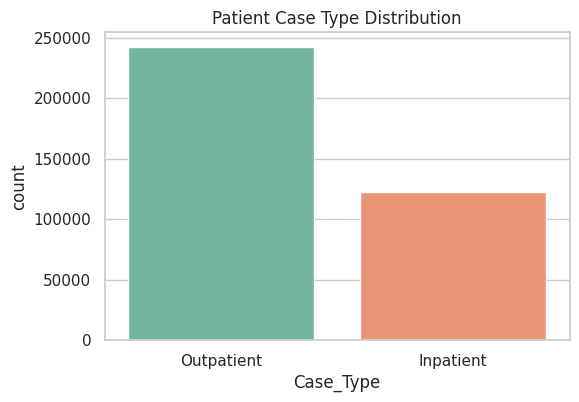

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=patient_data, x="Case_Type", palette="Set2")
plt.title("Patient Case Type Distribution")
plt.show()

<Figure size 1000x600 with 0 Axes>

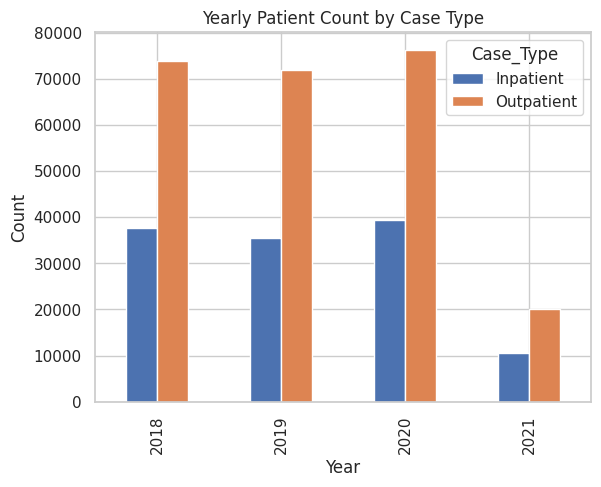

In [13]:
if "Archive_Date" in patient_data.columns:
    plt.figure(figsize=(10,6))
    patient_data.groupby(["Year", "Case_Type"]).size().unstack().plot(kind="bar")
    plt.title("Yearly Patient Count by Case Type")
    plt.ylabel("Count")
    plt.show()

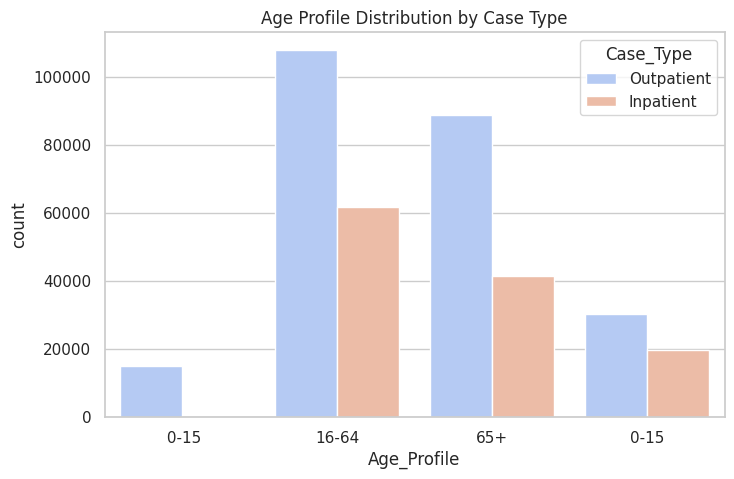

In [15]:
if "Age_Profile" in patient_data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=patient_data, x="Age_Profile", hue="Case_Type", palette="coolwarm")
    plt.title("Age Profile Distribution by Case Type")
    plt.show()

In [18]:
patient_data.to_csv("Cleaned_Patient_Data.csv", index=False)
print("\n Cleaned dataset saved as 'Cleaned_Patient_Data.csv'")


 Cleaned dataset saved as 'Cleaned_Patient_Data.csv'
